# 予習：ニューラルネットワークの数学的要素
ここでは、キーワードっぽいものと大切な知識のみ記録していく.

## 2.1 初めてのニューラルネットワーク
- クラスとラベル

> クラスとラベル
> 機械学習では、分類問題の**カテゴリ**(category)を**クラス**(class)と呼び、データ転を**サンプル**(sample)または**標本**と呼びます。そして、特定のサンプルに関連づけられているクラスを**ラベル**(label)と言います。

これをもとに具体例を見ていきましょう。
- train_images, train_labels → 訓練データセット
  - モデルが学習するデータ
- test_images, test_labels →テストデータセット
  - テストするデータ

今MNISTの手書き数字のデータの分類問題をしていて、1つ1つの写真は 28x28ピクセルのグレースケール画像です。
このとき、

In [1]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images.shape ## → (60000, 28, 28)
len(train_images) ## → 60000
train_lables ## → array([5,0,4, ... ,5,6,8], dtype=unit8)

test_images.shape ## → (10000,28,28)
len(test_images) ## →10000
test_lables ## → array([7,2,1, ... , 4,5,6], dtype=unit8)

2023-01-29 19:21:15.312468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'train_lables' is not defined

です。


ワークフローは以下のようです。
1. ニューラルネットワーク（モデル）に訓練データ（`train_images`, `train_labels`）を供給する。
2. ニューラルネットワークが画像トラベルの関連づけを学習する。
3. テストデータ(`test_images`)での予測値をニューラルネットワークに生成させ、それらの予測値が`test_labels`と一致するかどうかを検証します。

- ニューラルネットワークについて

ニューラルネットワークの中核的な構成要素は**層**(layer = データのフィルタ)というデータ処理モジュールです。

```python
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))
```

具体的にやっていることは、**これらの層は入力されたデータから表現(repression)を抽出し、うまくいけば、現在取り組んでいる問題にとってより意味のある表現を抽出する**ことです。

ディープラーニングはこれらの単純な層をつなぎ合わせたものとして構成されており、それらのそうは段階的なデータ蒸留(data distillation)を実装することになります。結局NNはさまざまな層を組み合わせて意味のあるデータを抽出しようとすることです。

このニューラルネットワークは2つの連続する密に結合された（Dense）（＝蜜月号されたニューラル層、**全結合層(fully connected layer)**）で構成されています。

2つ目の層は10個のユニットからなる**ソフトマックス(softmax)**層であり、合計すると1になる10個の確率スコアが含まれた配列を返しています。各スコアは現在の数字の画像が10個の数字クラスのいずれかに属している確率を表しています。

ニューラルネットワークを訓練するためには**コンパイル**ステップの一部として以下の3つの要素を選択する必要があります。
1. 損失関数
    訓練データでのネットワークの性能をどのように評価するのか、そしてネットワークを正しい方向にどのように向かわせるのかを決める方法。
2. オプティマイザ
    与えられたデータと損失関数に基づいてネットワークが自身を更新するためのメカニズム。
3. 訓練とテストを監視するための指標
    ここでは、正解率（画像が正しく分類された割合）のみを考慮する。

```python
network.compile(optimizer = "rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])
```

訓練する前に、
データの前処理をする必要があります。つまり、データの形状をネットワークが期待するものに変更して、すべての値を[0,1]の間に収まるようにスケーリングする必要があリマス。

例えば、今訓練データとして使用している画像は、
> 型が`unit8`、形状が`(60000,28,28)`の配列に格納されています。この配列には`[0,255]`の区間の値が含まれている。
> このデータを変換して
> 型が`float32`、形状が`(60000,28*28)`で`0~1`の値が含まれているような形に変更する。

``` python
train_images = train_images.reshape((60000, 28*28)) # reshapeしてあげた
train_images = train_images.astype("float32")/255 # ここで値を0~1にした
test_images = test_images.reshape((10000, 28*28)) # reshapeしてあげた
test_images = test_images.astype("float32")/255 # ここで値を0~1にした
```

またラベルもカテゴリの値でエンコードする必要があります。
```python
from keras.utilis
```

In [2]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

2023-01-29 19:22:24.646860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


具体的にやっていることは、**これらの層は入力されたデータから表現(repression)を抽出し、うまくいけば、現在取り組んでいる問題にとってより意味のある表現を抽出する**ことです。

ディープラーニングはこれらの単純な層をつなぎ合わせたものとして構成されており、それらのそうは段階的なデータ蒸留(data distillation)を実装することになります。結局NNはさまざまな層を組み合わせて意味のあるデータを抽出しようとすることです。

このニューラルネットワークは2つの連続する密に結合された（Dense）（＝蜜月号されたニューラル層、**全結合層(fully connected layer)**）で構成されています。

2つ目の層は10個のユニットからなる**ソフトマックス(softmax)**層であり、合計すると1になる10個の確率スコアが含まれた配列を返しています。各スコアは現在の数字の画像が10個の数字クラスのいずれかに属している確率を表しています。

ニューラルネットワークを訓練するためには**コンパイル**ステップの一部として以下の3つの要素を選択する必要があります。
1. 損失関数
    訓練データでのネットワークの性能をどのように評価するのか、そしてネットワークを正しい方向にどのように向かわせるのかを決める方法。
2. オプティマイザ
    与えられたデータと損失関数に基づいてネットワークが自身を更新するためのメカニズム。
3. 訓練とテストを監視するための指標
    ここでは、正解率（画像が正しく分類された割合）のみを考慮する。



network.compile(optimizer = "rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])

訓練する前に、
データの前処理をする必要があります。つまり、データの形状をネットワークが期待するものに変更して、すべての値を[0,1]の間に収まるようにスケーリングする必要があリマス。

例えば、今訓練データとして使用している画像は、
> 型が`unit8`、形状が`(60000,28,28)`の配列に格納されています。この配列には`[0,255]`の区間の値が含まれている。
> このデータを変換して
> 型が`float32`、形状が`(60000,28*28)`で`0~1`の値が含まれているような形に変更する。



In [3]:
train_images = train_images.reshape((60000, 28*28)) # reshapeしてあげた
train_images = train_images.astype("float32")/255 # ここで値を0~1にした
test_images = test_images.reshape((10000, 28*28)) # reshapeしてあげた
test_images = test_images.astype("float32")/255 # ここで値を0~1にした

またラベルもカテゴリの値でエンコードする必要があります。

In [4]:
from keras.utilis import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

ModuleNotFoundError: No module named 'keras.utilis'

これでネットワークの訓練をすることができマス。Kerasでネットワークを訓練するにはネットワークの`fit`メソッドを呼び出して、モデルを訓練データに`適合`(fit)させる。

In [5]:
network.fit(train_images,train_labels,epochs=5, batch_size =128)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

これをすると、
> train_data → 98.9% test_data → 97.8%

が出る。つまり、**過学習(overfitting)** の一例になっている。

## 2.2 ニューラルネトワークでのデータ表現
以上の例では、多次元のNumpy配列に格納されたデータを扱いました。これらの配列を**テンソル(tensor)**と言います。テンソルの **次元** を**軸（axis）** という。基本的にはテンソルはデータのコンテナ（入れ物）です。

### 2.2.1 スカラー
スカラーは0次元テンソルです。　Numpyのfloar32型やfloat64型はスカラーテンソルです。

Numpyでテンソルの軸の数を表示するには`ndim`属性を使用します。スカラーテンソルの軸の数は0です(ndim == 0)。テンソルの軸の数は**階数(rank)** と言います。


In [6]:
import numpy as np

x = np.array(12)
print("x is" ,x)
print("x.ndim is", x.ndim)

x is 12
x.ndim is 0


### 2.2.2　ベクトル：1次元テンソル
数値の配列は**ベクトル(vector)**と呼ばれます。ベクトルは1次元テンソルです。1次元テンソルの軸は1つです。

In [8]:
x = np.array([12,3,5,15,17])
print("x is", x)
print("x.ndim is", x.ndim)

x is [12  3  5 15 17]
x.ndim is 1


このベクトルの要素数は5なので**5次元ベクトル**です。5次元ベクトルと5次元テンソルは違いますよ。

### 2.2.3 行例：2次元テンソル
ベクトルの配列は**行列(matrix)**です。行列は行と列の2つの軸を持つので2次元テンソルです。

In [9]:
x = np.array([[5,78,3,45,0],[6,2,3,4,1],[7,35,34,45,2]])
print("x is", x)
print("x.ndim is", x.ndim)

x is [[ 5 78  3 45  0]
 [ 6  2  3  4  1]
 [ 7 35 34 45  2]]
x.ndim is 2


### 2.2.4 3次元テンソルとそれよりも高次元のテンソル
そうした行列を新しい配列に詰め込むと、3次元テンソルになります。めんどくさいので具体例は省略します。ディープラーニングでは大体4次元テンソルで、動画を扱うときは5次元のテンソルを扱います。

### 2.2.5 テンソルの重要な属性
- **軸の数(階数)**


    例えば3次元テンソルの軸は3つで、行列の軸は2つです。NumPyなどのPythonライブラリでは軸の数をテンソルのndim属性とも呼びます。
- **形状**


    テンソルの各軸に沿った次元の数を表す整数のタプル。例えば先の例では、行列の形状は(3,5)です。ベクトルの形状は（5,）のように単一の要素で表されますがスカラーの形状は空(())になります。
- **データの型**


    テンソルに含まれているデータの型。Pythonライブラリでは、通常はdtypeで表されます。例えば、テンソルの型はfloat32, unit8, float64などになります。なお、まれにchar型のテンソルが使用されることもあります。NumPyをはじめとするほとんどのライブラリでは、文字列型テンソルは存在しません。というのもテンソルはあらかじめ確保された連続するメモリ領域に存在しますが、文字列は可変調であり、そうした実装は不可能だからです。

In [10]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.ndim) # 3

print(train_images.shape) # (60000,28,28)

print(train_images.dtype) # unit8

3
(60000, 28, 28)
uint8


これからわかるように、train_imagesは28x28個の整数からなる60000この行列が含まれた配列です。それらの行列はそれぞれ0~255の係数を持つグレースケール画像です。4つ目のimageを描画してみましょう

2
(28, 28)


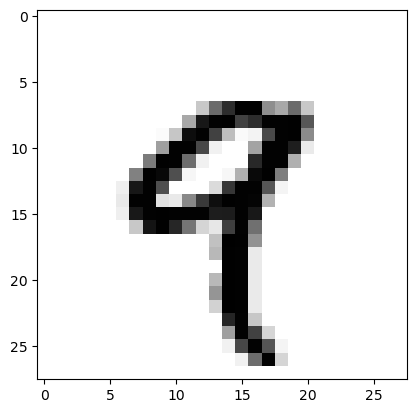

In [17]:
digit = train_images[4]
# print(digit)
print(digit.ndim)
print(digit.shape) # (28,28)

import matplotlib.pyplot as plt
plt.imshow(digit, cmap =plt.cm.binary)
plt.show()

### 2.2.6 Numpyでのテンソルの操作
テンソルの特定の要素を選択することを **テンソル分解(tensor slicing)** と呼びます。

次の例では10番目から100番目の手前までの数字を選択してそれらを(90,28,28)という形状の配列に配置します。

この時負の番号を引数に入れたら、軸の終端を基準とした相対位置を表します。


In [12]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


### 2.2.7 データバッチ
一般に、DLで使用されるデータテンソルの最初の軸は**サンプル軸(sample axis)(= サンプル次元)**と言います。それに加えて、DLのモデルでは、データセット全体を一度に処理するのではなく、データを小さなバッチに分割します。具体的には、このMNISTのデータセットのバッチサイズは128なので、1つのバッチは次のように定義される。

In [13]:
batch = train_images[:128] # train images[:128,:,:]と同じようなテンソル分解をしている

2つめのバッチは以下のよう。

In [14]:
batch = train_images[128:256]

n番目のバッチは以下のようになります。

In [15]:
# barch = train_images[128*(n-1):128*n]

このようなバッチテンソルを考える時、最初の軸は**バッチ軸(= バッチ次元)** と呼びます。

### 2.2.8 データテンソルの現実的な例
具体的に扱うのは以下のようなデータです。
- ベクトルデータ


    形状が(samples, features)の２次元テンソル
- 時系列データまたはシーケンス（系列）データ


    形状が(samples, timesteps,features)の３次元テンソル
- 画像


    形状が(samples, height, width, channels)または(samples, channels, height, width)の４次元テンソル
- 動画


    形状が(samples,frames, height, width, channels)または(samples,frames, channels, height, width)の５次元テンソル

### 2.2.9 ベクトルデータ
データ点をそれぞれベクトルとしてエンコードすることができる。このため、データバッチは２次元テンソル(ベクトルの配列)としてエンコードされます。この場合1つ目の軸が**サンプル軸**であり、2つ目の軸が**特徴軸**です。

例)

1. 人の年齢、郵便番号、住所と収入をまとめた生命表データセット
2. テキスト文書からなるデータセット

### 2.2.10 時系列データとシーケンスデータ
データにおいて時間（またはシーケンスの順序）が重要となる場合は、常に、そうしたデータを明示的な時間軸を持つ3次元テンソルに格納するのが理にかなっている。

時間軸は常に2つ目の軸にするのが慣例になっている。

例)

1. 株価のデータセット
2. ツイートのデータセット

### 2.2.11 画像データ
一般に画像は、幅、高さ、色深度の3つのチャネルで表されます。画像テンソルは常に3次元であり、ゲレースケールならば1次元のカラーチャネルを使用する。したがって、サンプルサイズが256 x 256のグレースケール画像が128個含まれたバッチは、形状が(128,256,256,1)のテンソルに格納できます。

TensorFlowは**チャネルラスト**の表現方法に則り(samples,height,width,channels)と配置します。

### 2.2.12 動画データ
5次元テンソルが必要なのは限られているけど動画とか。


## 2.3 ニューラルネットワークの歯車：テンソル演算
DLによって学習された変換は全て数値データのテンソルに適用される一握りの**テンソル演算** に分解できる。

### 2.3.1 要素ごとの演算
大変そうだけど、pythonだとベクトルかの実装に優れてるよ、っていうお話。

### 2.3.2 ブロードキャスト
2つのテンソルの形状が異なるとき、**小さい方が大きい方のテンソルに形状を合わせてブロードキャストされる** 。ただし、前提として可能であることと曖昧さがないことが条件になります。

手順は以下のよう。

1. ブロードキャスト軸(broadcast axis) を小さい方のテンソルに追加することで、大きいテンソルと次元(ndim)が同じになるようにする
2. 小さい方のテンソルを新しい軸上で繰り返すことで、大きいテンソルと完全に同じ形状にする。

In [21]:
import numpy as np
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

z = np.maximum(x,y)
print(z.shape)

(64, 3, 32, 10)


### 2.3.3 テンソルの内積
普通の行列の席と同じですな。

`np.dot(x,y)`と`x*y`の違いに気をつけましょう。

### 2.3.4 テンソルの変形
**テンソルの変形(tensor reshaping)** は、目的の形状に一致するようにテンソルの行と列の配置を変更することを意味する。もちろん、**変形したテンソルの要素数と変形後のテンソルの要素数の総数は同じ** になる必要があります。

In [28]:
x = np.array([[0.,1.],[2.,3.],[4.,5.]])
print(x)
print(x.shape) # (3,2)

x = x.reshape((6,1))
# print(x)
# print(x.shape) # (6,1)

x = x.reshape((2,3))
print(x)
print(x.shape)

[[0. 1.]
 [2. 3.]
 [4. 5.]]
(3, 2)
[[0. 1. 2.]
 [3. 4. 5.]]
(2, 3)


**転置(transposition)** を実装してみる

In [30]:
x = np.zeros((300,20))
x = x.T # np.transpose(x)でもOK
print(x.shape)

(20, 300)


### 2.3.5 テンソル演算の幾何学的解釈
これは大学受験でやった

### 2.3.6 DLの幾何学的解釈
DLのアプローチは、複雑な幾何学変換を基本的な変換の連鎖として少しずつ分解していくことと同義なのだ！（わー）

## 2.4 NNのエンジン：勾配ベースの最適化
まずReLUについて
```python
output = relu(dot(W,input) + b)
```
で、Wとbはテンソルでそれらは層の属性です。重みと呼びますよ〜。これらの重み行列には、ネットワークが訓練データから学習した情報が含まれています。

これらの重み行列には、初期値として小さな乱数値が設定されていて、これを**ランダム初期化(random initialization)** と言います。出発点ではこれらの重みは無意味であるが、フィードバックを用いて少しずつ調整されていきます。この調整を**訓練**といい、機械学習の目標である学習に匹敵するのです。

また、この学習は**訓練ループ** の中で行われて以下のような仕組みになっています。

1. 訓練データ`x`と対応する目的値`y`をバッチデータとして抽出する
2. ネットワークをxで実行して、予測値`y_pred`を取得する（= **forward propagation**）
3. このバッチでの損失値を計算する。これは、`y_pred`と`y`との不一致の目明日となる指標です。
4. このバッチでの損失値が少し小さくなるようにネットワークの全ての重みを更新する。

最終的に損失値が非常に小さいネットワークが得られる（＝学習済み）。

この時に重みを更新するときに微分を使います。

### 2.4.1　導関数
省略
### 2.4.2 テンソル演算の導関数：勾配
省略
### 2.4.3 確率的勾配降下法
微分可能だったら、理論的には最小値を求めることはできます、が実際には計算が煩雑でめっちゃ大変です。

それに変わる方法として、上述のアルゴリズムを使う方法があります。つまり、
> ランダムなデータバッチでの現在の損失値に基づいて、パラメータを少しずつ調整していく

のです。

1. 訓練データ`x`と対応する目的値`y`をバッチデータとして抽出する
2. ネットワークをxで実行して、予測値`y_pred`を取得する（= **forward propagation**）
3. このバッチでの損失値を計算する。これは、`y_pred`と`y`との不一致の目明日となる指標です。
4. ネットワークのパラメータを調整するために損失関数の勾配を計算する。この手順は**バックワードパス(backward pass)** と呼ばれる。
5. 例えば $W -= \mathrm{step} \times \mathrm{gradient}$を実行することで、そのパラメータを勾配とは逆方向に少し移動させることでこのバッチでの損失値を少し小さくする

これをする。これは、**ミニバッチ確率的勾配降下法(mini-batch stochastic gradient descent)** と呼びますよ。「確率的」とは、各データバッチがランダムに抽出されることに由来する。要するに「ランダム」ってことです。

このとき、**step係数を適切に選択することが大変重要です** 。

ミニバッチ確率的勾配降下法の1つに、データバッチを抽出するのではなく、イテレーションごとにサンプルと目的値を1つだけ抽出するものがある。これは（ミニバッチではなく）真の確率的勾配法といいます。あるいは、逆に利用可能な全てのデータで全ての手順を実行することもできる。これを**バッチ確率的勾配法**と言います。両方ともめっちゃコストかかります。

また、ミニバッチ確率的勾配降下法(SGD)には、次の重みの更新を計算するときに、単に購買の現在の値を調べるのではなく、以前の重みの更新を考慮に入れるものが何種類かあります。例えばモーメンタムSGD、AdaGrad, RMSPropなどがあります。これらのSGDは**最適化法(optimization method)** や**オプティマイザ（optimizer）** と呼ばれる。

モーメンタムを使うと、極小値に止まるだけではなく、大域的最小値にまで辿り着くことができます。


### 2.4.4 導関数の連鎖：バックプロパゲーションアルゴリズム

NNの関数は、それぞれ単純な既知の微分を持つ多くのテンソル演算をつなぎ合わせたものでできています。例えば3つのテンソル演算a, b, cと重み行列W1, W2, W3からなるネットワークfは次のように定義されます。

$$
\begin{align*}
\mathrm{f}(W1, W2, W3) = \mathrm{a}(W1,\mathrm{b}(W2,\mathrm{c}(W3)))
\end{align*}
$$

こうした関数の連鎖は**連鎖律(chain rules)** と呼ばれる恒等式を使って微分することができます。

NNの勾配値の計算に連鎖率を適応すると、**バックプロパゲーション** と呼ばれるアルゴリズムが得られます。これは、最終的な損失値を出発点として、出力側の層から入力側の層に向かって逆方向に進みます。そして連鎖率を適用することで各パラメータがその損失値にどのような影響を与えたのかを計算します。



## 2.5 最初の例を振り返る

In [34]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

# データの前処理
# print(train_images.shape) # (60000,28,28)
train_images = train_images.reshape((60000,28 * 28))
# print(train_images.shape) # (60000,784)

train_images = train_images.astype("float32")/255  # 全ての値を[0,1]に収まるようにスケーリングした。もともと型がuint8で[0,255]の区間の値が含まれている
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255  

# ネットワークの構築
network = models.Sequential()
network.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

# ネットワークのコンパイル
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

# 訓練ループの設定
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: in user code:

    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/zenonrk/opt/anaconda3/envs/deeplearning/lib/python3.9/site-packages/keras/backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible
